In [1]:
import os
from pathlib import Path
from torch.utils.data import DataLoader
from mp_transformer.config import CONFIG
from mp_transformer.train import setup

In [2]:
current_dir = Path.cwd().parts[-1]
if current_dir == "demo":
    os.chdir("..")
!pwd

/data/daniel/git/mp-transformer


In [3]:
CONFIG["hidden_dim"] = 40
CONFIG["latent_dim"] = 48
CONFIG["num_primitives"] = 1
CONFIG["num_attention_heads"] = 1
CONFIG["num_transformer_layers"] = 1
model_vae_single_layer_transformer, _, test_set = setup(CONFIG, test_set=True)
model_vae_single_layer_transformer = model_vae_single_layer_transformer.load_from_checkpoint("demo/BEST-VAE-single-layer-transformer.ckpt", config=CONFIG)

In [4]:
CONFIG["hidden_dim"] = 40
CONFIG["latent_dim"] = 48
CONFIG["num_primitives"] = 1
CONFIG["num_attention_heads"] = 4
CONFIG["num_transformer_layers"] = 4
model_vae, _, _ = setup(CONFIG)
model_vae = model_vae.load_from_checkpoint("demo/BEST-VAE.ckpt", config=CONFIG)

In [5]:
test_dataloader = DataLoader(
    test_set,
    batch_size=CONFIG["batch_size"],
    drop_last=True,
    num_workers=4,
)

In [6]:
CONFIG["hidden_dim"] = 40
CONFIG["latent_dim"] = 8
CONFIG["num_primitives"] = 6
CONFIG["num_attention_heads"] = 1
CONFIG["num_transformer_layers"] = 1
model_single_layer_transformer, _, _ = setup(CONFIG)
model_single_layer_transformer = model_single_layer_transformer.load_from_checkpoint("demo/BEST-single-layer-transformer.ckpt", config=CONFIG)

In [7]:
CONFIG["hidden_dim"] = 40
CONFIG["latent_dim"] = 8
CONFIG["num_primitives"] = 6
CONFIG["num_attention_heads"] = 4
CONFIG["num_transformer_layers"] = 4
model, _, _ = setup(CONFIG)
model = model.load_from_checkpoint("demo/BEST-bottleneck.ckpt", config=CONFIG)

In [8]:
from pytorch_lightning import Trainer

# trainer = Trainer(gpus=1, logger=False)
# losses = []
# for m in [model, model_single_layer_transformer, model_vae, model_vae_single_layer_transformer]:
#     res = trainer.test(m, dataloaders=test_dataloader)
#     losses.append(res[0]["avg_test_loss"])
# print(losses)

In [9]:
# %%capture
# from mp_transformer.datasets import ToyDataset
# import numpy as np

# scaling_factors = np.linspace(0.01, 2, 20)

# losses = []

# for scale in scaling_factors:
#     # Modify the dataset size based on the current scaling factor
#     current_sequence_length = int(CONFIG["sequence_length"] * scale)
    
#     # Create the dataset with modified N
#     test_dataset = ToyDataset(
#         path="data/toy/test-set/",
#         return_segments=True,
#         sequence_length=current_sequence_length,
#         N=CONFIG["N_val"],
#     )
    
#     # Create the DataLoader
#     test_dataloader = DataLoader(
#         test_dataset,
#         batch_size=CONFIG["batch_size"],
#         drop_last=True,
#         num_workers=4,
#     )
    

#     trainer = Trainer(gpus=1, logger=False)
#     res = trainer.test(model, dataloaders=test_dataloader)
#     losses.append(res[0]["avg_test_loss"])

In [10]:
import matplotlib.pyplot as plt

# plt.plot(scaling_factors, losses, '-o')
# plt.xlabel('Scaling Factor')
# plt.ylabel('Test Loss')
# plt.title('Test Loss vs. Dataset Size')
# plt.grid(True)
# plt.show()

In [11]:
%%capture
from mp_transformer.datasets import ToyDataset
import numpy as np

# Models to test
models = [model, model_single_layer_transformer, model_vae, model_vae_single_layer_transformer]
model_names = ["model", "model_single_layer_transformer", "model_vae", "model_vae_single_layer_transformer"]

scaling_factors = np.linspace(0.01, 2, 20)

all_losses = {}

for m, name in zip(models, model_names):
    losses = []
    for scale in scaling_factors:
        # Modify the dataset size based on the current scaling factor
        current_sequence_length = int(CONFIG["sequence_length"] * scale)

        # Create the dataset with modified N
        test_dataset = ToyDataset(
            path="data/toy/test-set/",
            return_segments=True,
            sequence_length=current_sequence_length,
            N=CONFIG["N_val"],
        )

        # Create the DataLoader
        test_dataloader = DataLoader(
            test_dataset,
            batch_size=CONFIG["batch_size"],
            drop_last=True,
            num_workers=4,
        )

        trainer = Trainer(gpus=1, logger=False)
        res = trainer.test(m, dataloaders=test_dataloader)
        losses.append(res[0]["avg_test_loss"])

    all_losses[name] = losses


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_D

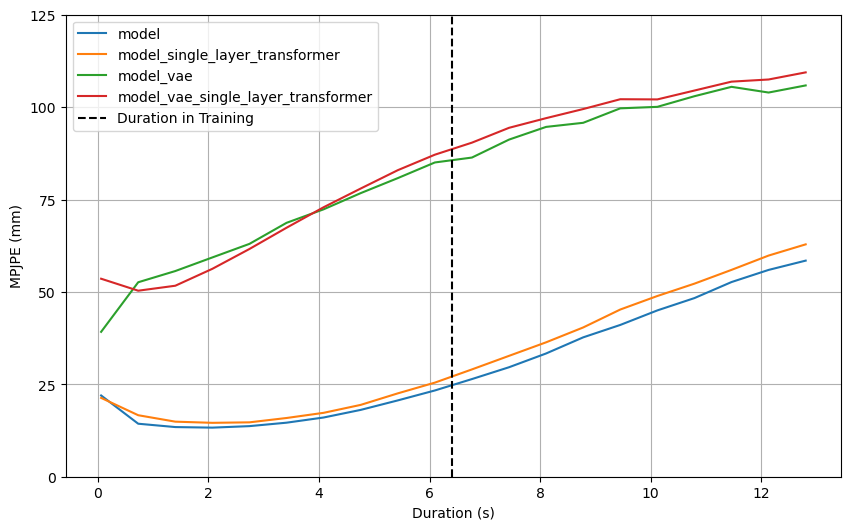

In [12]:
import numpy as np
from matplotlib.ticker import MultipleLocator

# Conversion factor
conversion_factor = 6.4  # 1 scaling factor equals 6.4 seconds

# Calculate durations in seconds
durations = scaling_factors * conversion_factor

# Plotting the losses for each model
plt.figure(figsize=(10, 6))

for model_name, losses in all_losses.items():
    # plt.plot(durations, losses, label=model_name, marker='o')
    plt.plot(durations, losses, label=model_name)

# plt.title("MPJPE vs. ")
plt.xlabel("Duration (s)")
plt.ylabel("MPJPE (mm)")
plt.yticks(np.arange(0, 150, 25))
plt.axvline(x=6.4, color='black', linestyle='--', label="Duration in Training")
# plt.ylim(0, 625)
# Hide every other y-tick label
ax = plt.gca()
# for label in ax.yaxis.get_ticklabels()[1::2]:
#     label.set_visible(False)
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import json

# with open("demo/losses_over_models_and_sequnce_lenghts.json", "w") as f:
with open("demo/mpjpe_comparison.json", "w") as f:
    json.dump(all_losses, f)

In [16]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
    # return sum(p.numel() for p in model.parameters())

# Iterate over the models and print their total number of parameters
for model_instance, model_name in zip(models, model_names):
    num_params = count_parameters(model_instance)
    print(f"{model_name}: {num_params:,} trainable parameters")


model: 1,552,364 trainable parameters
model_single_layer_transformer: 391,124 trainable parameters
model_vae: 2,251,924 trainable parameters
model_vae_single_layer_transformer: 571,204 trainable parameters
